In [1]:
from Nozzle_1D import Nozzle
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
SUPERCOARSE = Nozzle("inputs/Medium_inputs.nml")
SUPERCOARSE.CFL = .3
SUPERCOARSE.NI = 51

COARSE = Nozzle("inputs/Medium_inputs.nml")
COARSE.CFL = .3
COARSE.NI = 101

MEDIUM = Nozzle("inputs/Medium_inputs.nml")
MEDIUM.CFL = .2
MEDIUM.NI = 201

FINE = Nozzle("inputs/Medium_inputs.nml")
FINE.NI = 401
FINE.CFL = .2

SUPERFINE = Nozzle("inputs/Medium_inputs.nml")
SUPERFINE.NI = 801
SUPERFINE.CFL = .075


In [3]:
Mass_compute_supercoarse, Momentum_compute_supercoarse, Energy_compute_supercoarse, \
Mass_exact_supercoarse, Momentum_exact_supercoarse, Energy_exact_supercoarse, \
convergence_history_supercoarse = SUPERCOARSE.RUN_SIMULATION(verbose=False)

Mass_compute_coarse, Momentum_compute_coarse, Energy_compute_coarse, \
Mass_exact_coarse, Momentum_exact_coarse, Energy_exact_coarse, \
convergence_history_coarse = COARSE.RUN_SIMULATION(verbose=False)

Mass_compute_medium, Momentum_compute_medium, Energy_compute_medium, \
Mass_exact_medium, Momentum_exact_medium, Energy_exact_medium, \
convergence_history_medium = MEDIUM.RUN_SIMULATION(verbose=False)

Mass_compute_fine, Momentum_compute_fine, Energy_compute_fine, \
Mass_exact_fine, Momentum_exact_fine, Energy_exact_fine, \
convergence_history_fine = FINE.RUN_SIMULATION(verbose=False)

Mass_compute_superfine, Momentum_compute_superfine, Energy_compute_superfine, \
Mass_exact_superfine, Momentum_exact_superfine, Energy_exact_superfine, \
convergence_history_superfine = SUPERFINE.RUN_SIMULATION(verbose=True)


Converged at Rk/R1: 9.845733446825381e-13 in 4500 iterations.
Converged at Rk/R1: 7.632659404534941e-13 in 8800 iterations.
Converged at Rk/R1: 9.379379734877618e-13 in 25700 iterations.
Converged at Rk/R1: 8.680240985647643e-13 in 53900 iterations.
Iteration: 1 1.0001561489810318
Iteration: 101 0.9745967895646842
Iteration: 201 0.9483707699578381
Iteration: 301 0.9231482444982831
Iteration: 401 0.8991389440481085
Iteration: 501 0.8762108600442233
Iteration: 601 0.8543952752308283
Iteration: 701 0.8337063798998924
Iteration: 801 0.8141450286416364
Iteration: 901 0.7957019606081279
Iteration: 1001 0.7783603354796658
Iteration: 1101 0.7620976747780724
Iteration: 1201 0.7468873284725719
Iteration: 1301 0.7326995682748118
Iteration: 1401 0.7195023810913748
Iteration: 1501 0.7072620092577329
Iteration: 1601 0.6959432612746382
Iteration: 1701 0.6855095981657232
Iteration: 1801 0.6759229861118737
Iteration: 1901 0.6671434956187281
Iteration: 2001 0.6591286214667332
Iteration: 2101 0.651832297

In [4]:
def compute_errors(var_compute, var_exact, NI):
    """Compute L1, L2, and Linf error for a variable."""
    L1 = np.linalg.norm(var_compute - var_exact, 1) / (NI - 1)
    L2 = np.linalg.norm(var_compute - var_exact, 2) / np.sqrt(NI - 1)
    Linf = np.linalg.norm(var_compute - var_exact, np.inf)
    return L1, L2, Linf

def compute_order(errors):
    """Compute order of convergence given a list of errors."""
    return [np.log(errors[i] / errors[i+1]) / np.log(2) for i in range(len(errors) - 1)]

# Compute errors for Mass
mass_errors_L1 = []
mass_errors_L2 = []
mass_errors_Linf = []

mass_errors_L1.append(compute_errors(Mass_compute_supercoarse, Mass_exact_supercoarse, SUPERCOARSE.NI)[0])
mass_errors_L1.append(compute_errors(Mass_compute_coarse, Mass_exact_coarse, COARSE.NI)[0])
mass_errors_L1.append(compute_errors(Mass_compute_medium, Mass_exact_medium, MEDIUM.NI)[0])
mass_errors_L1.append(compute_errors(Mass_compute_fine, Mass_exact_fine, FINE.NI)[0])
mass_errors_L1.append(compute_errors(Mass_compute_superfine, Mass_exact_superfine, SUPERFINE.NI)[0])

mass_errors_L2.append(compute_errors(Mass_compute_supercoarse, Mass_exact_supercoarse, SUPERCOARSE.NI)[1])
mass_errors_L2.append(compute_errors(Mass_compute_coarse, Mass_exact_coarse, COARSE.NI)[1])
mass_errors_L2.append(compute_errors(Mass_compute_medium, Mass_exact_medium, MEDIUM.NI)[1])
mass_errors_L2.append(compute_errors(Mass_compute_fine, Mass_exact_fine, FINE.NI)[1])
mass_errors_L2.append(compute_errors(Mass_compute_superfine, Mass_exact_superfine, SUPERFINE.NI)[1])

mass_errors_Linf.append(compute_errors(Mass_compute_supercoarse, Mass_exact_supercoarse, SUPERCOARSE.NI)[2])
mass_errors_Linf.append(compute_errors(Mass_compute_coarse, Mass_exact_coarse, COARSE.NI)[2])
mass_errors_Linf.append(compute_errors(Mass_compute_medium, Mass_exact_medium, MEDIUM.NI)[2])
mass_errors_Linf.append(compute_errors(Mass_compute_fine, Mass_exact_fine, FINE.NI)[2])
mass_errors_Linf.append(compute_errors(Mass_compute_superfine, Mass_exact_superfine, SUPERFINE.NI)[2])

mass_order_L1 = compute_order(mass_errors_L1)
mass_order_L2 = compute_order(mass_errors_L2)
mass_order_Linf = compute_order(mass_errors_Linf)

# Repeat for Momentum
momentum_errors_L1 = []
momentum_errors_L2 = []
momentum_errors_Linf = []

momentum_errors_L1.append(compute_errors(Momentum_compute_supercoarse, Momentum_exact_supercoarse, SUPERCOARSE.NI)[0])
momentum_errors_L1.append(compute_errors(Momentum_compute_coarse, Momentum_exact_coarse, COARSE.NI)[0])
momentum_errors_L1.append(compute_errors(Momentum_compute_medium, Momentum_exact_medium, MEDIUM.NI)[0])
momentum_errors_L1.append(compute_errors(Momentum_compute_fine, Momentum_exact_fine, FINE.NI)[0])
momentum_errors_L1.append(compute_errors(Momentum_compute_superfine, Momentum_exact_superfine, SUPERFINE.NI)[0])

momentum_errors_L2.append(compute_errors(Momentum_compute_supercoarse, Momentum_exact_supercoarse, SUPERCOARSE.NI)[1])
momentum_errors_L2.append(compute_errors(Momentum_compute_coarse, Momentum_exact_coarse, COARSE.NI)[1])
momentum_errors_L2.append(compute_errors(Momentum_compute_medium, Momentum_exact_medium, MEDIUM.NI)[1])
momentum_errors_L2.append(compute_errors(Momentum_compute_fine, Momentum_exact_fine, FINE.NI)[1])
momentum_errors_L2.append(compute_errors(Momentum_compute_superfine, Momentum_exact_superfine, SUPERFINE.NI)[1])

momentum_errors_Linf.append(compute_errors(Momentum_compute_supercoarse, Momentum_exact_supercoarse, SUPERCOARSE.NI)[2])
momentum_errors_Linf.append(compute_errors(Momentum_compute_coarse, Momentum_exact_coarse, COARSE.NI)[2])
momentum_errors_Linf.append(compute_errors(Momentum_compute_medium, Momentum_exact_medium, MEDIUM.NI)[2])
momentum_errors_Linf.append(compute_errors(Momentum_compute_fine, Momentum_exact_fine, FINE.NI)[2])
momentum_errors_Linf.append(compute_errors(Momentum_compute_superfine, Momentum_exact_superfine, SUPERFINE.NI)[2])

momentum_order_L1 = compute_order(momentum_errors_L1)
momentum_order_L2 = compute_order(momentum_errors_L2)
momentum_order_Linf = compute_order(momentum_errors_Linf)

# Repeat for Energy
energy_errors_L1 = []
energy_errors_L2 = []
energy_errors_Linf = []

energy_errors_L1.append(compute_errors(Energy_compute_supercoarse, Energy_exact_supercoarse, SUPERCOARSE.NI)[0])
energy_errors_L1.append(compute_errors(Energy_compute_coarse, Energy_exact_coarse, COARSE.NI)[0])
energy_errors_L1.append(compute_errors(Energy_compute_medium, Energy_exact_medium, MEDIUM.NI)[0])
energy_errors_L1.append(compute_errors(Energy_compute_fine, Energy_exact_fine, FINE.NI)[0])
energy_errors_L1.append(compute_errors(Energy_compute_superfine, Energy_exact_superfine, SUPERFINE.NI)[0])

energy_errors_L2.append(compute_errors(Energy_compute_supercoarse, Energy_exact_supercoarse, SUPERCOARSE.NI)[1])
energy_errors_L2.append(compute_errors(Energy_compute_coarse, Energy_exact_coarse, COARSE.NI)[1])
energy_errors_L2.append(compute_errors(Energy_compute_medium, Energy_exact_medium, MEDIUM.NI)[1])
energy_errors_L2.append(compute_errors(Energy_compute_fine, Energy_exact_fine, FINE.NI)[1])
energy_errors_L2.append(compute_errors(Energy_compute_superfine, Energy_exact_superfine, SUPERFINE.NI)[1])

energy_errors_Linf.append(compute_errors(Energy_compute_supercoarse, Energy_exact_supercoarse, SUPERCOARSE.NI)[2])
energy_errors_Linf.append(compute_errors(Energy_compute_coarse, Energy_exact_coarse, COARSE.NI)[2])
energy_errors_Linf.append(compute_errors(Energy_compute_medium, Energy_exact_medium, MEDIUM.NI)[2])
energy_errors_Linf.append(compute_errors(Energy_compute_fine, Energy_exact_fine, FINE.NI)[2])
energy_errors_Linf.append(compute_errors(Energy_compute_superfine, Energy_exact_superfine, SUPERFINE.NI)[2])

energy_order_L1 = compute_order(energy_errors_L1)
energy_order_L2 = compute_order(energy_errors_L2)
energy_order_Linf = compute_order(energy_errors_Linf)


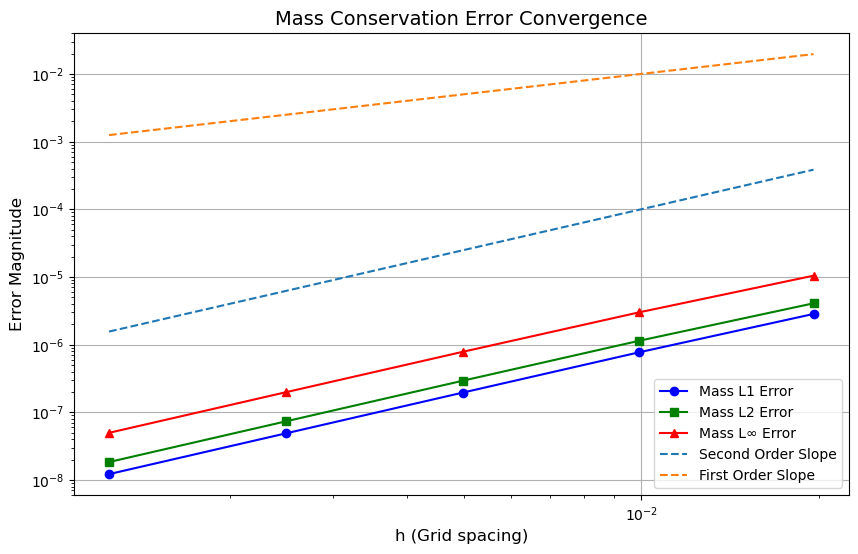

In [5]:
# Reverse the error lists to match order from fine to supercoarse (as in original pressure plot)
# Reorder the error lists, placing superfine as the first element
mass_L1_error = [mass_errors_L1[4], mass_errors_L1[3], mass_errors_L1[2], mass_errors_L1[1], mass_errors_L1[0]]
mass_L2_error = [mass_errors_L2[4], mass_errors_L2[3], mass_errors_L2[2], mass_errors_L2[1], mass_errors_L2[0]]
mass_Linf_error = [mass_errors_Linf[4], mass_errors_Linf[3], mass_errors_Linf[2], mass_errors_Linf[1], mass_errors_Linf[0]]


# Define x_values for h (grid spacing proxy) — smaller h means finer grid
# You can define these based on actual grid spacing if available; here's a placeholder:
x_values = [1/NI for NI in [801, 401, 201, 101, 51]]  # reverse order for plotting from fine to coarse

# Reference slopes for visual comparison
y_values = [x**1 for x in x_values]    # First-order reference
y_values2 = [x**2 for x in x_values]   # Second-order reference

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot errors
plt.loglog(x_values, mass_L1_error, 'o-', label='Mass L1 Error', color='b')
plt.loglog(x_values, mass_L2_error, 's-', label='Mass L2 Error', color='g')
plt.loglog(x_values, mass_Linf_error, '^-', label='Mass L∞ Error', color='r')
plt.loglog(x_values, y_values2, "--", label='Second Order Slope')
plt.loglog(x_values, y_values, "--", label='First Order Slope')

plt.xlabel('h (Grid spacing)', fontsize=12)
plt.ylabel('Error Magnitude', fontsize=12)
plt.title('Mass Conservation Error Convergence', fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


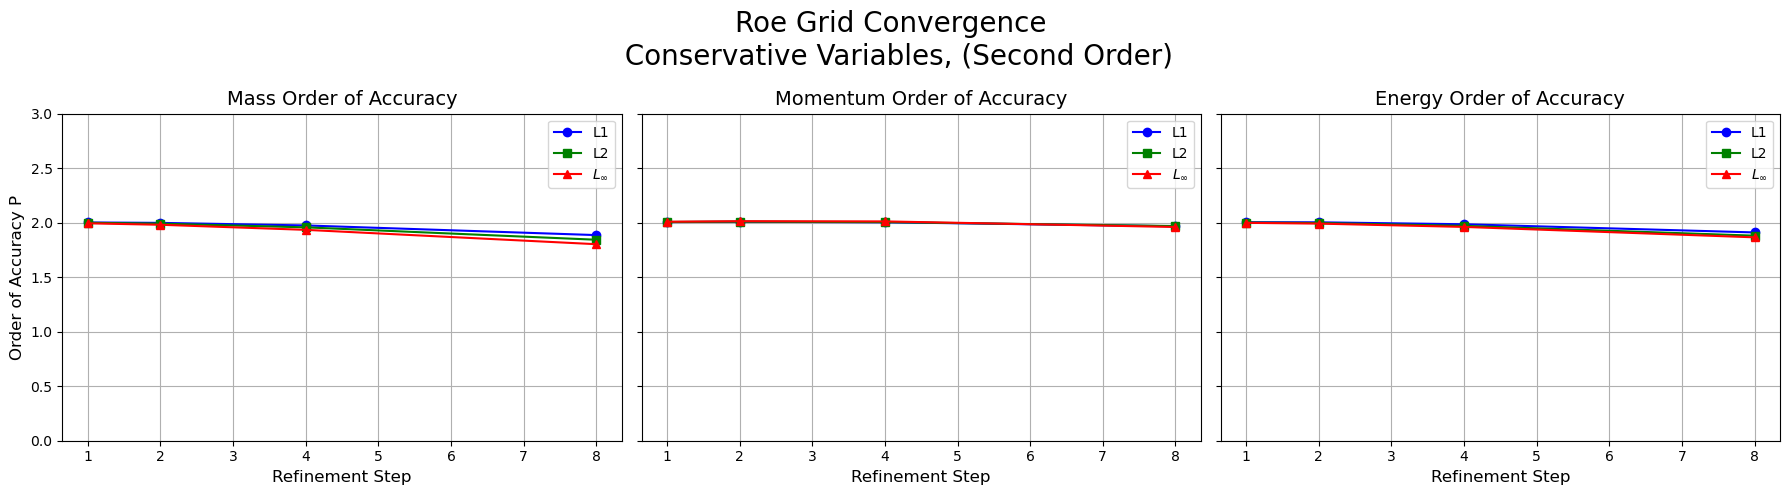

In [6]:
import matplotlib.pyplot as plt

x_values = [1, 2, 4,8]  # refinement steps (e.g., h ratios)

# Flip orders to match coarsest to finest
# Reorder the convergence orders, placing superfine as the first element
mass_L1 = [ mass_order_L1[3], mass_order_L1[2], mass_order_L1[1], mass_order_L1[0]]
mass_L2 = [ mass_order_L2[3], mass_order_L2[2], mass_order_L2[1], mass_order_L2[0]]
mass_Linf = [ mass_order_Linf[3], mass_order_Linf[2], mass_order_Linf[1], mass_order_Linf[0]]

momentum_L1 = [ momentum_order_L1[3], momentum_order_L1[2], momentum_order_L1[1], momentum_order_L1[0]]
momentum_L2 = [ momentum_order_L2[3], momentum_order_L2[2], momentum_order_L2[1], momentum_order_L2[0]]
momentum_Linf = [ momentum_order_Linf[3], momentum_order_Linf[2], momentum_order_Linf[1], momentum_order_Linf[0]]

energy_L1 = [energy_order_L1[3], energy_order_L1[2], energy_order_L1[1], energy_order_L1[0]]
energy_L2 = [ energy_order_L2[3], energy_order_L2[2], energy_order_L2[1], energy_order_L2[0]]
energy_Linf = [ energy_order_Linf[3], energy_order_Linf[2], energy_order_Linf[1], energy_order_Linf[0]]


fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# --- Mass ---
axs[0].plot(x_values, mass_L1, 'o-', label='L1', color='b')
axs[0].plot(x_values, mass_L2, 's-', label='L2', color='g')
axs[0].plot(x_values, mass_Linf, '^-', label=r"$L_\infty$", color='r')
axs[0].set_title("Mass Order of Accuracy", fontsize=14)
axs[0].set_xlabel("Refinement Step", fontsize=12)
axs[0].set_ylabel("Order of Accuracy P", fontsize=12)
axs[0].set_ylim([0, 3])
axs[0].grid(True)
axs[0].legend()

# --- Momentum ---
axs[1].plot(x_values, momentum_L1, 'o-', label='L1', color='b')
axs[1].plot(x_values, momentum_L2, 's-', label='L2', color='g')
axs[1].plot(x_values, momentum_Linf, '^-', label=r"$L_\infty$", color='r')
axs[1].set_title("Momentum Order of Accuracy", fontsize=14)
axs[1].set_xlabel("Refinement Step", fontsize=12)
axs[1].set_ylim([0, 3])
axs[1].grid(True)
axs[1].legend()

# --- Energy ---
axs[2].plot(x_values, energy_L1, 'o-', label='L1', color='b')
axs[2].plot(x_values, energy_L2, 's-', label='L2', color='g')
axs[2].plot(x_values, energy_Linf, '^-', label=r"$L_\infty$", color='r')
axs[2].set_title("Energy Order of Accuracy", fontsize=14)
axs[2].set_xlabel("Refinement Step", fontsize=12)
axs[2].set_ylim([0, 3])
axs[2].grid(True)
axs[2].legend()
plt.suptitle("Roe Grid Convergence \n Conservative Variables, (Second Order)",fontsize=20)
plt.tight_layout()
plt.savefig("Roe_Order2")
